In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:

#loading dataset
df=pd.read_csv(r'file:///C:\Users\SHAKIR\OneDrive\Desktop\DATASET\Wine_clust.csv')

In [3]:

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:

df.shape

(178, 13)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
#checking for null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
duplicate = df[df.duplicated()]#checking for duplicated rows

In [8]:
duplicate

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [9]:
# OUTLIER DETECTION

In [10]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

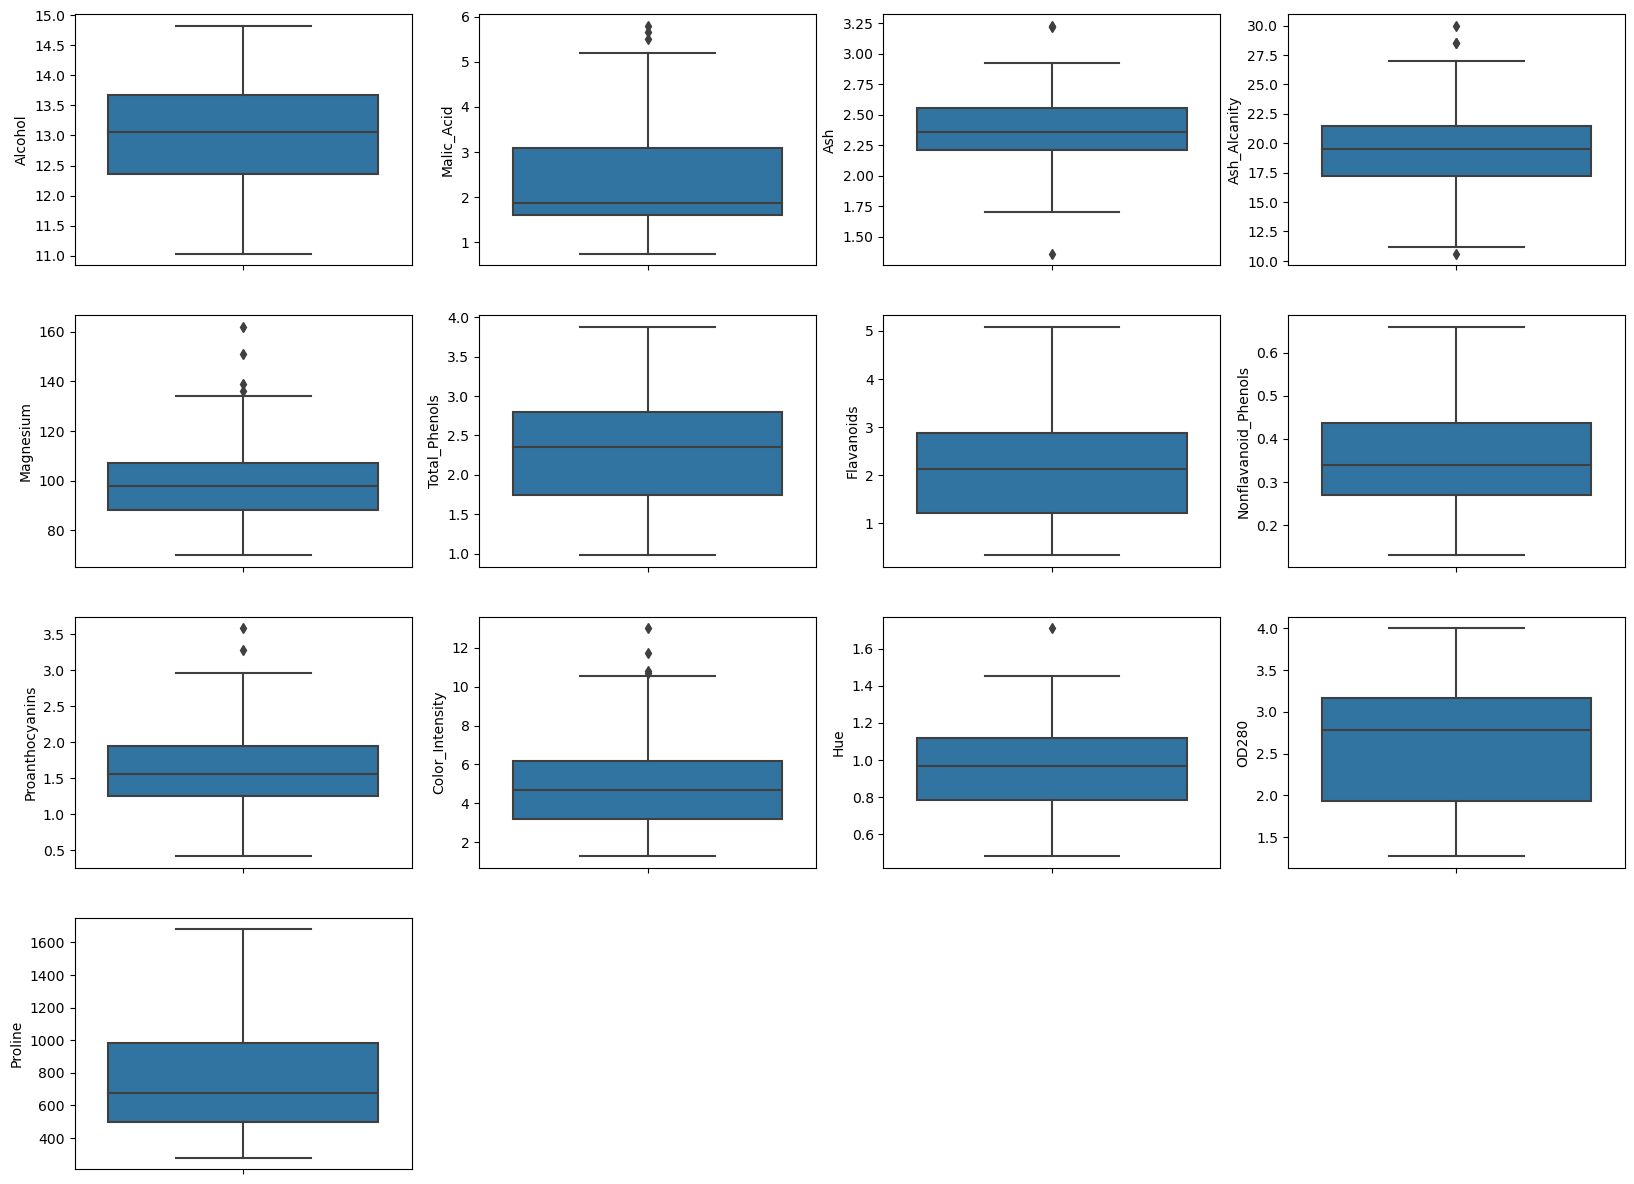

In [11]:
#boxplot of each columns....
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data=df,y='Alcohol')

plt.subplot(4,4,2)
sns.boxplot(data=df,y='Malic_Acid')

plt.subplot(4,4,3)
sns.boxplot(data=df,y='Ash')

plt.subplot(4,4,4)
sns.boxplot(data=df,y='Ash_Alcanity')

plt.subplot(4,4,5)
sns.boxplot(data=df,y='Magnesium')

plt.subplot(4,4,6)
sns.boxplot(data=df,y='Total_Phenols')

plt.subplot(4,4,7)
sns.boxplot(data=df,y='Flavanoids')

plt.subplot(4,4,8)
sns.boxplot(data=df,y='Nonflavanoid_Phenols')

plt.subplot(4,4,9)
sns.boxplot(data=df,y='Proanthocyanins')

plt.subplot(4,4,10)
sns.boxplot(data=df,y='Color_Intensity')

plt.subplot(4,4,11)
sns.boxplot(data=df,y='Hue')

plt.subplot(4,4,12)
sns.boxplot(data=df,y='OD280')

plt.subplot(4,4,13)
sns.boxplot(data=df,y='Proline');

In [12]:
# OUTLIER HANDLING METHOD

In [13]:

list1=[ 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity', 'Hue']

Q1=np.percentile(df['Malic_Acid'],25,interpolation='midpoint')
Q2=np.percentile(df['Malic_Acid'],50,interpolation='midpoint')
Q3=np.percentile(df['Malic_Acid'],75,interpolation='midpoint')

In [14]:

print(Q1)
print(Q2)
print(Q3)

1.605
1.8650000000000002
3.065


In [15]:
IQR=Q3-Q1
print(IQR)

1.46


In [16]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(lower_limit)
print(upper_limit)

-0.585
5.255


In [18]:
outlier=[]
for x in df['Malic_Acid']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)


In [19]:
  outlier

[5.8, 5.51, 5.65]

In [20]:
#removing outliers
ind_Malic_Acid=df['Malic_Acid']>upper_limit

In [21]:
df.loc[ind_Malic_Acid]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [22]:
df.loc[ind_Malic_Acid].index

Int64Index([123, 137, 173], dtype='int64')

In [23]:
list1=[ 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity', 'Hue']

Q1_Ash=np.percentile(df['Ash'],25,interpolation='midpoint')
Q2_Ash=np.percentile(df['Ash'],50,interpolation='midpoint')
Q3_Ash=np.percentile(df['Ash'],75,interpolation='midpoint')

Q1_Ash_Alcanity=np.percentile(df['Ash_Alcanity'],25,interpolation='midpoint')
Q2_Ash_Alcanity=np.percentile(df['Ash_Alcanity'],50,interpolation='midpoint')
Q3_Ash_Alcanity=np.percentile(df['Ash_Alcanity'],75,interpolation='midpoint')

Q1_Magnesium=np.percentile(df['Magnesium'],25,interpolation='midpoint')
Q2_Magnesium=np.percentile(df['Magnesium'],50,interpolation='midpoint')
Q3_Magnesium=np.percentile(df['Magnesium'],75,interpolation='midpoint')

Q1_Proanthocyanins=np.percentile(df['Proanthocyanins'],25,interpolation='midpoint')
Q2_Proanthocyanins=np.percentile(df['Proanthocyanins'],50,interpolation='midpoint')
Q3_Proanthocyanins=np.percentile(df['Proanthocyanins'],75,interpolation='midpoint')

Q1_Color_Intensity=np.percentile(df['Color_Intensity'],25,interpolation='midpoint')
Q2_Color_Intensity=np.percentile(df['Color_Intensity'],50,interpolation='midpoint')
Q3_Color_Intensity=np.percentile(df['Color_Intensity'],75,interpolation='midpoint')

Q1_Hue=np.percentile(df['Hue'],25,interpolation='midpoint')
Q2_Hue=np.percentile(df['Hue'],50,interpolation='midpoint')
Q3_Hue=np.percentile(df['Hue'],75,interpolation='midpoint')

In [24]:

print('Q1_Ash=',Q1_Ash)
print('Q2_Ash=',Q2_Ash)
print('Q3_Ash=',Q3_Ash)
print('\n')
print('Q1_Ash_Alcanity=',Q1_Ash_Alcanity)
print('Q2_Ash_Alcanity=',Q2_Ash_Alcanity)
print('Q3_Ash_Alcanity=',Q3_Ash_Alcanity)
print('\n')
print('Q1_Magnesium=',Q1_Magnesium)
print('Q2_Magnesium=',Q2_Magnesium)
print('Q3_Magnesium=',Q3_Magnesium)
print('\n')
print('Q1_Proanthocyanins=',Q1_Proanthocyanins)
print('Q2_Proanthocyanins=',Q2_Proanthocyanins)
print('Q3_Proanthocyanins=',Q3_Proanthocyanins)
print('\n')
print('Q1_Color_Intensity=',Q1_Color_Intensity)
print('Q2_Color_Intensity=',Q2_Color_Intensity)
print('Q3_Color_Intensity=',Q3_Color_Intensity)
print('\n')
print('Q1_Hue=',Q1_Hue)
print('Q2_Hue=',Q1_Hue)
print('Q3_Hue=',Q1_Hue)

Q1_Ash= 2.21
Q2_Ash= 2.36
Q3_Ash= 2.5549999999999997


Q1_Ash_Alcanity= 17.2
Q2_Ash_Alcanity= 19.5
Q3_Ash_Alcanity= 21.5


Q1_Magnesium= 88.0
Q2_Magnesium= 98.0
Q3_Magnesium= 107.0


Q1_Proanthocyanins= 1.25
Q2_Proanthocyanins= 1.5550000000000002
Q3_Proanthocyanins= 1.95


Q1_Color_Intensity= 3.23
Q2_Color_Intensity= 4.6899999999999995
Q3_Color_Intensity= 6.2


Q1_Hue= 0.785
Q2_Hue= 0.785
Q3_Hue= 0.785


In [25]:
IQR_Ash=Q3_Ash-Q1_Ash
print('IQR_Ash=',IQR_Ash)
print('\n')
IQR_Ash_Alcanity=Q3_Ash_Alcanity-Q1_Ash_Alcanity
print('IQR_Ash_Alcanity=',IQR_Ash_Alcanity)
print('\n')
IQR_Magnesium=Q3_Magnesium-Q1_Magnesium
print('IQR_Magnesium=',IQR_Magnesium)
print('\n')
IQR_Proanthocyanins=Q3_Proanthocyanins-Q1_Proanthocyanins
print('IQR_Proanthocyanins=',IQR_Proanthocyanins)
print('\n')
IQR_Color_Intensity=Q3_Color_Intensity-Q1_Color_Intensity
print('IQR_Color_Intensity=',IQR_Color_Intensity)
print('\n')
IQR_Hue=Q3_Hue-Q1_Hue
print('IQR_Hue=',IQR_Hue)
print('\n')

IQR_Ash= 0.34499999999999975


IQR_Ash_Alcanity= 4.300000000000001


IQR_Magnesium= 19.0


IQR_Proanthocyanins= 0.7


IQR_Color_Intensity= 2.97


IQR_Hue= 0.3350000000000001




In [26]:


upper_limit_Ash=Q3_Ash+1.5*IQR_Ash
lower_limit_Ash=Q1_Ash-1.5*IQR_Ash
print('lower_limit_Ash=',lower_limit_Ash)
print('upper_limit_Ash=',upper_limit_Ash)
print('\n')
upper_limit_Ash_Alcanity=Q3_Ash_Alcanity+1.5*IQR_Ash_Alcanity
lower_limit_Ash_Alcanity=Q1_Ash_Alcanity-1.5*IQR_Ash_Alcanity
print('lower_limit_Ash_Alcanity=',lower_limit_Ash_Alcanity)
print('upper_limit_Ash_Alcanity=',upper_limit_Ash_Alcanity)
print('\n')
upper_limit_Magnesium=Q3_Magnesium+1.5*IQR_Magnesium
lower_limit_Magnesium=Q1_Magnesium-1.5*IQR_Magnesium
print('lower_limit_Magnesium=',lower_limit_Magnesium)
print('upper_limit_Magnesium=',upper_limit_Magnesium)
print('\n')
upper_limit_Proanthocyanins=Q3_Proanthocyanins+1.5*IQR_Proanthocyanins
lower_limit_Proanthocyanins=Q1_Proanthocyanins-1.5*IQR_Proanthocyanins
print('lower_limit_Proanthocyanins=',lower_limit_Proanthocyanins)
print('upper_limit_Proanthocyanins=',upper_limit_Proanthocyanins)
print('\n')
upper_limit_Color_Intensity=Q3_Color_Intensity+1.5*IQR_Color_Intensity
lower_limit_Color_Intensity=Q1_Color_Intensity-1.5*IQR_Color_Intensity
print('lower_limit_Color_Intensity=',lower_limit_Color_Intensity)
print('upper_limit_Color_Intensity=',upper_limit_Color_Intensity)
print('\n')
upper_limit_Hue=Q3_Hue+1.5*IQR_Hue
lower_limit_Hue=Q1_Hue-1.5*IQR_Hue
print('lower_limit_Hue=',lower_limit_Hue)
print('upper_limit_Hue=',upper_limit_Hue)
print('\n')

lower_limit_Ash= 1.6925000000000003
upper_limit_Ash= 3.0724999999999993


lower_limit_Ash_Alcanity= 10.749999999999998
upper_limit_Ash_Alcanity= 27.950000000000003


lower_limit_Magnesium= 59.5
upper_limit_Magnesium= 135.5


lower_limit_Proanthocyanins= 0.20000000000000018
upper_limit_Proanthocyanins= 3.0


lower_limit_Color_Intensity= -1.225
upper_limit_Color_Intensity= 10.655000000000001


lower_limit_Hue= 0.28249999999999986
upper_limit_Hue= 1.6225000000000003




In [27]:
outlier_Ash=[]
for x in df['Ash']:
  if((x>upper_limit_Ash) or  (x<lower_limit)):
    outlier.append(x)

In [28]:
 outlier

[5.8, 5.51, 5.65, 3.22, 3.23]

In [30]:
outlier_Proanthocyanins=[]
for x in df['Proanthocyanins']:
  if((x>upper_limit_Proanthocyanins) or  (x<lower_limit)):
    outlier.append(x)

In [31]:
outlier

[5.8, 5.51, 5.65, 3.22, 3.23, 3.28, 3.58, 3.28, 3.58]

In [32]:
outlier_Ash_Alcanity=[]
for x in df['Ash_Alcanity']:
  if((x>upper_limit_Ash_Alcanity) or  (x<lower_limit)):
    outlier.append(x)

In [33]:
outlier

[5.8, 5.51, 5.65, 3.22, 3.23, 3.28, 3.58, 3.28, 3.58, 30.0, 28.5, 28.5]

In [35]:
outlier_ind_Magnesium=[]
for x in df['Magnesium']:
  if((x>upper_limit_Magnesium) or  (x<lower_limit)):
    outlier.append(x)

In [36]:
outlier

[5.8,
 5.51,
 5.65,
 3.22,
 3.23,
 3.28,
 3.58,
 3.28,
 3.58,
 30.0,
 28.5,
 28.5,
 151,
 139,
 136,
 162]

In [37]:
outlier_Color_Intensity=[]
for x in df['Color_Intensity']:
  if((x>upper_limit_Color_Intensity) or  (x<lower_limit)):
    outlier.append(x)

In [38]:
outlier

[5.8,
 5.51,
 5.65,
 3.22,
 3.23,
 3.28,
 3.58,
 3.28,
 3.58,
 30.0,
 28.5,
 28.5,
 151,
 139,
 136,
 162,
 10.8,
 13.0,
 11.75,
 10.68]

In [41]:
outlier_Hue=[]
for x in df['Hue']:
  if((x>upper_limit_Hue) or  (x<lower_limit)):
    outlier.append(x)

In [42]:
outlier

[1.71]

In [56]:

ind_Ash = df['Ash']>upper_limit_Ash

In [57]:
df.loc[ind_Ash].index

Int64Index([25, 121], dtype='int64')

In [54]:
ind_Proanthocyanins=df['Proanthocyanins']>upper_limit_Proanthocyanins

In [58]:
df.loc[ind_Proanthocyanins]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [59]:
df.loc[ind_Proanthocyanins].index

Int64Index([95, 110], dtype='int64')

In [62]:
ind_Ash_Alcanity = df['Ash_Alcanity']>upper_limit_Ash_Alcanity

In [63]:
df.loc[ind_Ash_Alcanity]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [64]:
df.loc[ind_Ash_Alcanity].index

Int64Index([73, 121, 127], dtype='int64')

In [66]:
ind_Magnesium = df['Magnesium']>upper_limit_Magnesium

In [67]:
df.loc[ind_Magnesium]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [68]:
df.loc[ind_Magnesium].index

Int64Index([69, 73, 78, 95], dtype='int64')

In [70]:
ind_Color_Intensity = df['Color_Intensity']>upper_limit_Color_Intensity

In [71]:
df.loc[ind_Color_Intensity]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


In [72]:
df.loc[ind_Color_Intensity].index

Int64Index([151, 158, 159, 166], dtype='int64')

In [73]:
ind_Hue = df['Hue']>upper_limit_Hue

In [74]:
df.loc[ind_Hue]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
115,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [75]:
df.loc[ind_Hue].index

Int64Index([115], dtype='int64')

In [83]:
df1 = df.drop([25, 121,95, 110,73, 121, 127,69, 73, 78, 95,151, 158, 159, 166,155])

In [84]:
#KMEANS CLUSTERING

C:\Users\SHAKIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

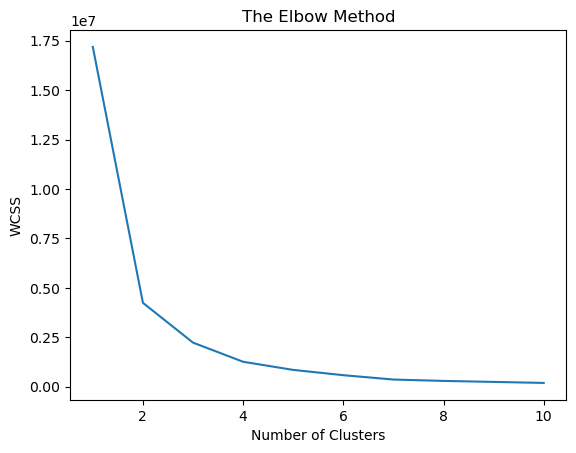

In [85]:
from sklearn.cluster import KMeans#importing kmeans from cluster 
wcss=[]#empty list to append wcss(within cluster sum of squares)

#finding value for optimum number of clusters
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)#kmeans++ to avoid random intialization trap
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)#inertia_ used to find wcss
#ploting number of clusters against wcss
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [86]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)#kmeans++ to avoid random intialization trap
y_kmeans=kmeans.fit_predict(df1)

In [87]:
from sklearn.metrics import silhouette_score

In [88]:
sil_avg=silhouette_score(df1,y_kmeans)#calculating silhouette score for kmeans clustering

In [89]:
sil_avg#silhouette score ,with no of cluster=2

0.6633021284062001

In [90]:
kmeans_sil_score = [] # empty list for appending silhouette scores
for i in range(2,14):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    y_kmeans=kmeans.fit_predict(df1)
    sil_avg = silhouette_score(df1, y_kmeans)#calculating silhouettte score
    kmeans_sil_score.append(sil_avg) 

print(kmeans_sil_score)

[0.6633021284062001, 0.5747220456515887, 0.5590596863011206, 0.5579741713040928, 0.5765955631472071, 0.5758898860964295, 0.5617603995099454, 0.5611388010589935, 0.5364691106578816, 0.5419224941197849, 0.5358700956629698, 0.5363808334503847]


Text(0, 0.5, 'Silhouette Score')

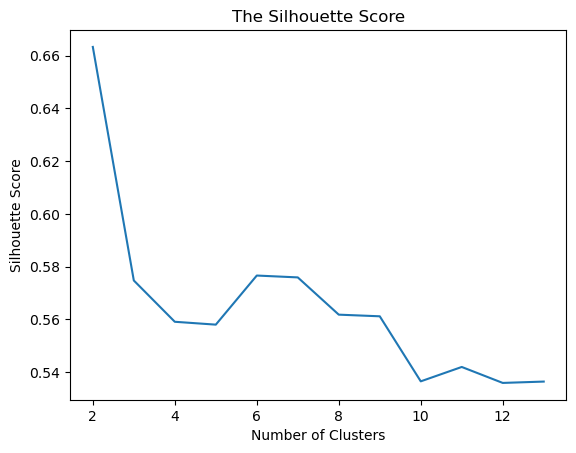

In [91]:
#ploting number of clusters against silhouette score
plt.plot(range(2,14),kmeans_sil_score)
plt.title('The Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

From the above plotted graph of silhouette score vs no of clusters we can infer that maximum silhouette score is for no of clusters=2

In [92]:
#2. AGGLOMERATIVE HIERARCHIAL CLUSTERING

In [93]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean Distance')

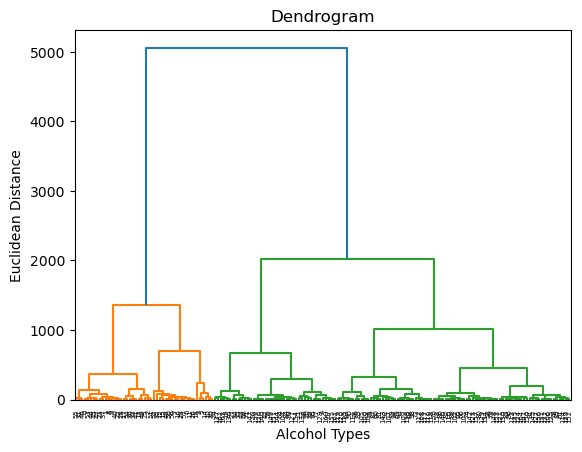

In [94]:
dendrogram=sch.dendrogram(sch.linkage(df1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Alcohol Types')
plt.ylabel('Euclidean Distance')

In [95]:
from sklearn.cluster import AgglomerativeClustering
     


In [96]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

y_hc=hc.fit_predict(df1)

In [97]:
sil_avg2=silhouette_score(df1,y_hc)#calculating silhouette score

In [98]:
sil_avg2

0.6656688104061967

In [99]:
#plotting sillhouette score 
agglo_sil_score = [] # empty list for appending silhouette scores
for i in range(2,11):
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    y_hc=hc.fit_predict(df1)
    sil_avg2 = silhouette_score(df1,y_hc)#calculating silhouettte score
    agglo_sil_score.append(sil_avg2) 

print(agglo_sil_score)  

[0.6656688104061967, 0.5409061578969029, 0.5453862012190008, 0.5225454922457017, 0.5319128549907557, 0.5383687307178913, 0.5239300615913749, 0.5228133681591034, 0.5279779108610896]


Text(0, 0.5, 'Silhouette Score')

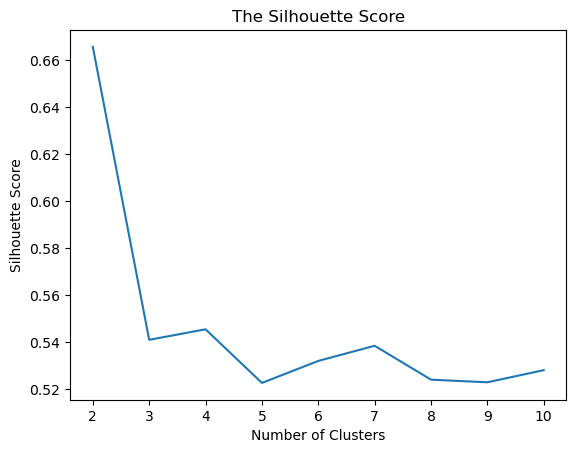

In [100]:
#ploting number of clusters against silhouette score
plt.plot(range(2,11),agglo_sil_score)
plt.title('The Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

From the above plotted silhouette score of Agglomerative clustering we can infer that silhouette score is maximum for no of clusters=2

# DBSCAN

In [103]:
from sklearn.neighbors import NearestNeighbors

In [104]:
neighbors = NearestNeighbors(n_neighbors=14)#min_samples choosen as 14
neighbors_fit = neighbors.fit(df1)
distances, indices = neighbors_fit.kneighbors(df1)

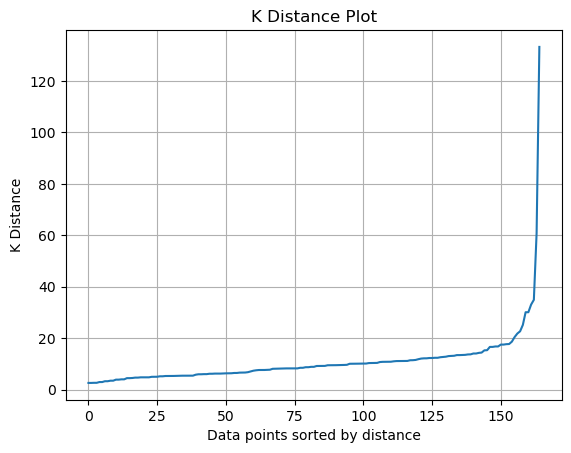

In [105]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K Distance Plot')
plt.ylabel('K Distance')
plt.xlabel('Data points sorted by distance')
plt.grid()

From the graph we can infer that elbow occuring above the value 30

In [106]:
from sklearn.cluster import DBSCAN

Epsilon(eps) value choosen is 38, min_samples >= D+1(D-Dimension of dataset),D here is 13,so D+1=14 . The minimum value of MinPts must be chosen at least 14

In [108]:

db=DBSCAN(eps=38,min_samples=14,metric='euclidean',algorithm='auto')

In [109]:
y_db=db.fit_predict(df1)

In [110]:

y_db
     

array([-1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0], dtype=int64)

In [111]:
sil_avg3=silhouette_score(df1,y_db)#calculating silhouette score

In [112]:
sil_avg3

0.5379029174020773

In [113]:
#plotting sillhouette score 
db_sil_score = [] # empty list for appending silhouette scores
for i in range(23,42):
    db=DBSCAN(eps=i,min_samples=14,metric='euclidean',algorithm='auto')
    y_db=db.fit_predict(df1)
    sil_avg_db = silhouette_score(df1,y_db)#calculating silhouettte score
    db_sil_score.append(sil_avg_db) 

print(db_sil_score)  

[-0.11613043584081517, -0.158288859089751, -0.158288859089751, -0.010007360766956484, -0.002803336962958065, 0.052109860521477695, 0.11071347912391125, 0.17496905322072853, 0.2486233172786492, 0.2486233172786492, 0.24293358959006345, 0.24293358959006345, 0.2525436723034739, 0.5109223744591859, 0.5379029174020773, 0.5379029174020773, 0.5379029174020773, 0.551773789298016, 0.3942094234392374]


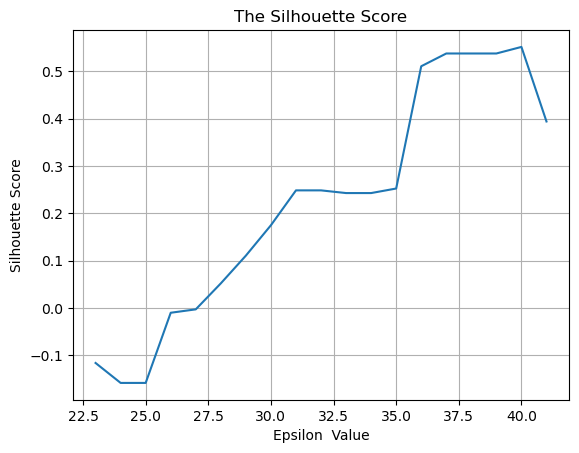

In [114]:
#ploting number of clusters against silhouette score
plt.plot(range(23,42),db_sil_score)
plt.title('The Silhouette Score')
plt.xlabel('Epsilon  Value')
plt.ylabel('Silhouette Score')
plt.grid()

#From the above plotted graph of silhouette score of DBSCAN ,the silhouette score is maximum for epsilon values from 38 to 40.



CONCLUSION

1.For Kmeans the silhouette score =0.659 for number of clusters= 2.

2.For Agglomerative hc the silhouette score =0.653 for number of clusters =2.

3.For DBSCAN the silhouette score =0.530 for eps=38 and min_samples=14.